<a href="https://colab.research.google.com/github/fabricio-franca/Data_Science/blob/main/AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/BASE DE DADOS - PROJETO FIAP.xlsx')

# Convertendo a coluna 'EMISSÃO' para datetime
df['EMISSÃO'] = pd.to_datetime(df['EMISSÃO'], format='%d/%m/%Y')

# Visualizando a estrutura dos dados
print(df.info())

# Visualizando os primeiros registros
print(df.head())

# Verificando valores nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27505 entries, 0 to 27504
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NF                    27503 non-null  float64       
 1   ST                    27503 non-null  object        
 2   CFOP                  27503 non-null  float64       
 3   EMISSÃO               27503 non-null  datetime64[ns]
 4   VEND.                 27503 non-null  float64       
 5   RAZÃO SOCIAL CLIENTE  27503 non-null  object        
 6   UF                    27503 non-null  object        
 7   CÓD.MAT.              27503 non-null  object        
 8   DESCRIÇÃO MATERIAL    27503 non-null  object        
 9   UNID. MEDIDA          27503 non-null  object        
 10  QUANTIDADE            27503 non-null  float64       
 11  VALOR UNITÁRIO        27468 non-null  float64       
 12  VALOR TOTAL           27505 non-null  object        
dtypes: datetime64[ns

In [31]:
# Função para converter valores para float, retornando NaN em caso de erro
def convert_to_float(value):
    try:
        return float(str(value).replace('.', '').replace(',', '.'))
    except ValueError:
        return float('nan')

# Aplicando a função à coluna 'VALOR TOTAL'
df['VALOR TOTAL'] = df['VALOR TOTAL'].apply(convert_to_float)

# Removendo linhas onde 'VALOR TOTAL' é NaN
df = df.dropna(subset=['VALOR TOTAL'])

# Verificando a conversão
print(df['VALOR TOTAL'])
print(df.info())

0        3.090000e+03
1        3.897000e+03
2        1.148000e+03
3        3.396000e+03
4        7.695000e+03
             ...     
27499    1.160000e+03
27500    7.000000e+02
27501    1.760000e+03
27502    2.640000e+03
27503    7.893809e+15
Name: VALOR TOTAL, Length: 27504, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 27504 entries, 0 to 27503
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NF                    27503 non-null  float64       
 1   ST                    27503 non-null  object        
 2   CFOP                  27503 non-null  float64       
 3   EMISSÃO               27503 non-null  datetime64[ns]
 4   VEND.                 27503 non-null  float64       
 5   RAZÃO SOCIAL CLIENTE  27503 non-null  object        
 6   UF                    27503 non-null  object        
 7   CÓD.MAT.              27503 non-null  object        
 8   DESCRIÇÃO MATERIAL  

In [17]:
# Contagem de registros por cliente
cliente_count = df['RAZÃO SOCIAL CLIENTE'].value_counts()
print(cliente_count)

RAZÃO SOCIAL CLIENTE
SOHIPREN S.A                                                   4472
MOBIL MARKET COMERCIO LTDA                                      875
ECOAGRICOLA INDUSTRIA E COMERCIO DE EQUIPAMENTOS LTDA           738
LUMA IMPLEMENTOS AGRICOLAS LTDA                                 735
TERESA COLOMBO EQUIPAMENTOS RODOVIARIOS LTDA                    664
                                                               ... 
CONCESSIONARIA DO AEROPORTO INTERNACIONAL DE GUARULHOS S.A.       1
AGRAMAQ MAQUINAS E EQUIPAMENTOS LTDA                              1
HIDROS COMERCIO E SERVICOS DE EQUIPAMENTO EIRELI                  1
TRATORPRIMA DISTRIBUIDORA LTDA                                    1
ORIGINAL DISTRIBUIDORA DE PECAS LTDA                              1
Name: count, Length: 1595, dtype: int64


In [18]:
# Soma total das vendas por cliente
cliente_total_vendas = df.groupby('RAZÃO SOCIAL CLIENTE')['VALOR TOTAL'].sum()
print(cliente_total_vendas)


RAZÃO SOCIAL CLIENTE
21.328.685 MARIA DE FATIMA ANDRADE DOS SANTOS                      695
3M FABRICACAO E COMERCIO DE EQPTOS HIDRAULICOS EIRELI              585
48.857.530 SIRLEY QUEIROZ DE MIRANDA SILVA                        1300
49.145.409 DEMILTON RIBEIRO CAMPOS                                1270
49.145.572 SANDRO MORETTI ROSA FERREIRA                           3380
                                                                ...   
ZANESCO & ZANESCO PERF DE POCOS ART DA EST DE SOCORRO LTDA        6322
ZARAPLAST S.A.                                                    1818
ZE BENTO MAQUINAS E IMPLEMENTOS AGRICOLAS LTDA                    1970
ZM CASA DO AGRICULTOR MAQUINAS E IMPLEM AGRICOLAS LTDA        30398.64
ZOLLERN TRANSMISSOES MECANICAS LTDA                             760.12
Name: VALOR TOTAL, Length: 1595, dtype: object


In [19]:
# Soma total das vendas por cliente
cliente_total_vendas = df.groupby('RAZÃO SOCIAL CLIENTE')['VALOR TOTAL'].sum()
print(cliente_total_vendas)


RAZÃO SOCIAL CLIENTE
21.328.685 MARIA DE FATIMA ANDRADE DOS SANTOS                      695
3M FABRICACAO E COMERCIO DE EQPTOS HIDRAULICOS EIRELI              585
48.857.530 SIRLEY QUEIROZ DE MIRANDA SILVA                        1300
49.145.409 DEMILTON RIBEIRO CAMPOS                                1270
49.145.572 SANDRO MORETTI ROSA FERREIRA                           3380
                                                                ...   
ZANESCO & ZANESCO PERF DE POCOS ART DA EST DE SOCORRO LTDA        6322
ZARAPLAST S.A.                                                    1818
ZE BENTO MAQUINAS E IMPLEMENTOS AGRICOLAS LTDA                    1970
ZM CASA DO AGRICULTOR MAQUINAS E IMPLEM AGRICOLAS LTDA        30398.64
ZOLLERN TRANSMISSOES MECANICAS LTDA                             760.12
Name: VALOR TOTAL, Length: 1595, dtype: object


In [34]:
# Estatísticas descritivas
estatisticas_descritivas = df[['VALOR UNITÁRIO', 'VALOR TOTAL']].describe()
print(estatisticas_descritivas)

       VALOR UNITÁRIO   VALOR TOTAL
count    27468.000000  2.750400e+04
mean       709.044196  2.870060e+11
std        713.625486  4.759800e+13
min          0.040680  0.000000e+00
25%        298.000000  8.700000e+02
50%        555.000000  2.180000e+03
75%        935.000000  1.925400e+04
max      35000.000000  7.893809e+15


In [33]:
# Distribuição das vendas por UF
uf_vendas = df['UF'].value_counts()
print(uf_vendas)

UF
SP    12388
EX     4967
GO     2670
MG     2633
PR     1246
RS      980
SC      672
PA      386
ES      372
RJ      208
BA      166
MA      137
RO      135
TO      102
AM       76
AL       65
CE       63
MS       61
PE       60
MT       52
RN       21
SE       19
PI       12
DF        6
PB        5
AP        1
Name: count, dtype: int64


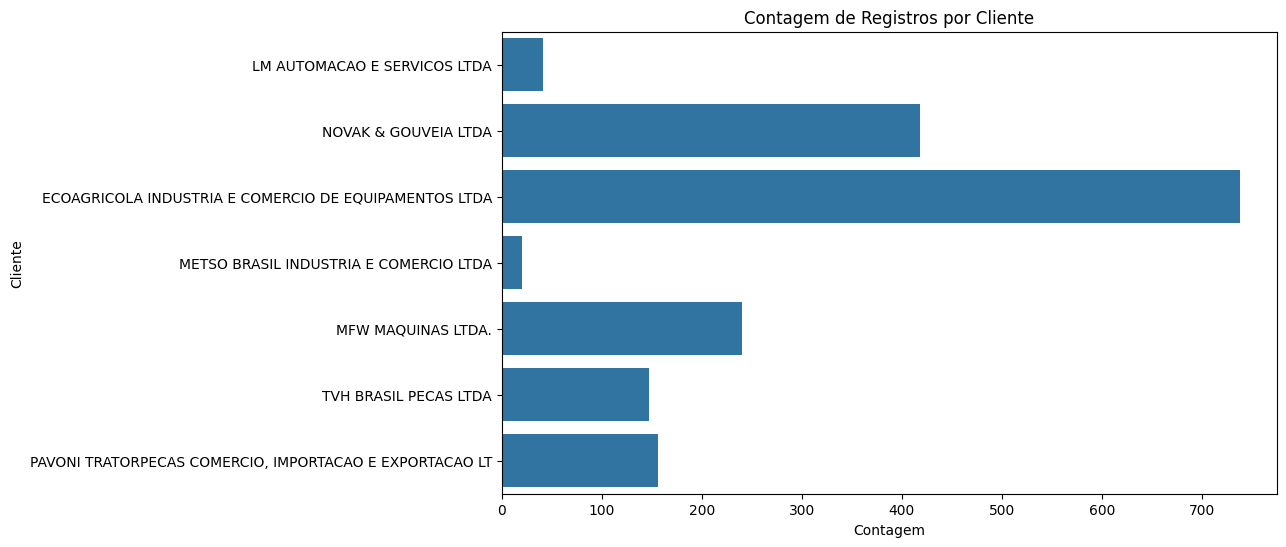

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='RAZÃO SOCIAL CLIENTE', order=df['RAZÃO SOCIAL CLIENTE'].head(10).value_counts().sort_values().index)
plt.title('Contagem de Registros por Cliente')
plt.xlabel('Contagem')
plt.ylabel('Cliente')
plt.show()

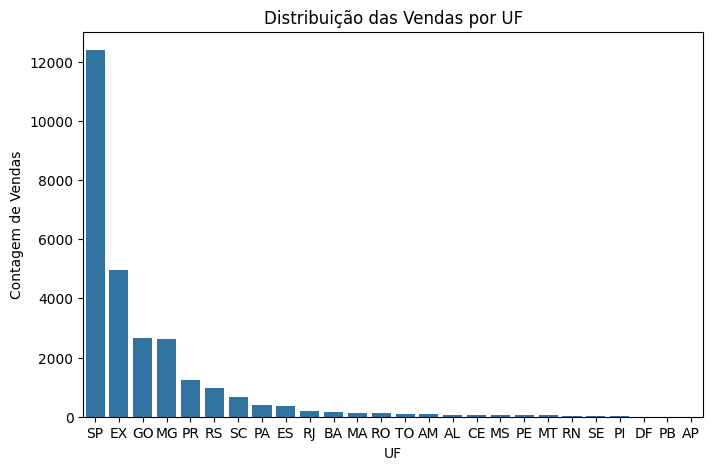

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='UF', order=df['UF'].value_counts().index)
plt.title('Distribuição das Vendas por UF')
plt.xlabel('UF')
plt.ylabel('Contagem de Vendas')
plt.show()

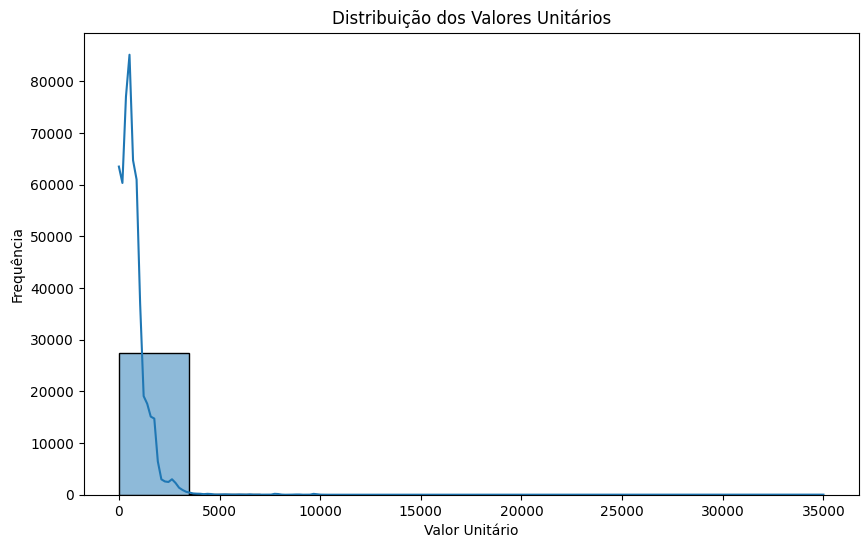

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['VALOR UNITÁRIO'], bins=10, kde=True)
plt.title('Distribuição dos Valores Unitários')
plt.xlabel('Valor Unitário')
plt.ylabel('Frequência')
plt.show()

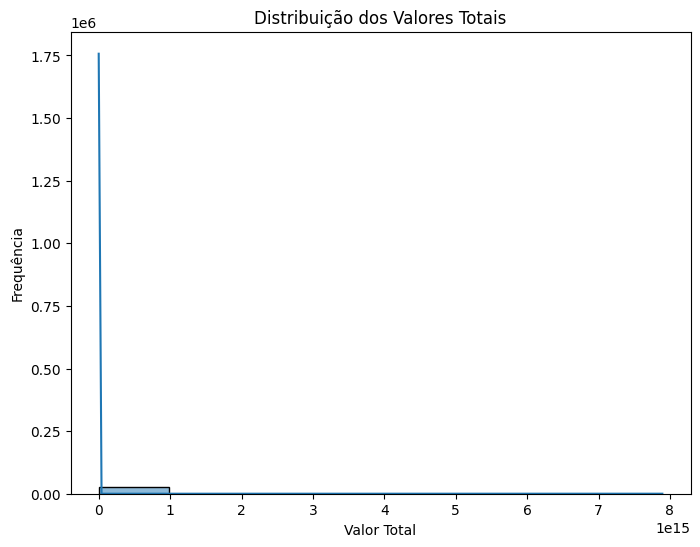

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['VALOR TOTAL'], bins=8, kde=True)
plt.title('Distribuição dos Valores Totais')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.show()


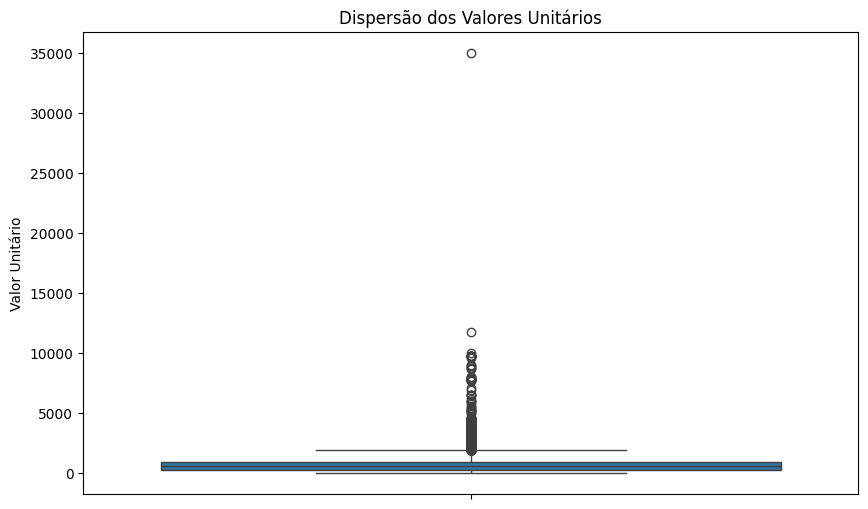

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='VALOR UNITÁRIO')
plt.title('Dispersão dos Valores Unitários')
plt.ylabel('Valor Unitário')
plt.show()

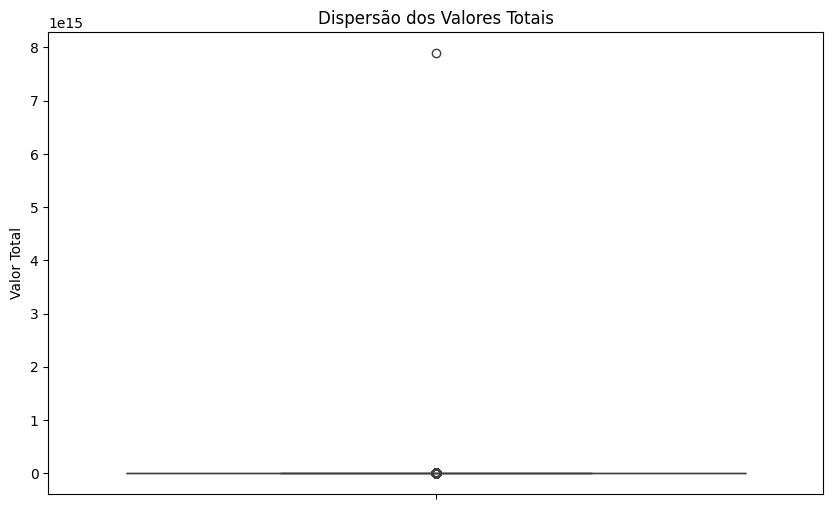

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='VALOR TOTAL')
plt.title('Dispersão dos Valores Totais')
plt.ylabel('Valor Total')
plt.show()

## Análise Exploratória
Com base nas análises acima, podemos observar:

Contagem de Registros por Cliente:
Identificar quais clientes têm mais registros de vendas pode ajudar a entender melhor o perfil dos principais clientes.
Soma Total das Vendas por Cliente:
Verificar quais clientes representam maior volume de vendas pode ajudar a direcionar estratégias de marketing e vendas.
Estatísticas Descritivas:
A média, mediana e dispersão dos valores unitários e totais fornecem insights sobre a variação dos preços dos produtos vendidos.
Distribuição das Vendas por UF:
Entender a distribuição geográfica das vendas pode ajudar a identificar regiões com maior demanda.
Visualizações Gráficas:
Gráficos de barras, histogramas e boxplots ajudam a visualizar a distribuição e dispersão dos dados de forma clara e intuitiva.